In [3]:
from functools import partial
import os
import time

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch

In [5]:
from equilib import Equi2Pers

from LookAround.core.improc import (
    load2numpy,
    load2torch,
    post_process_for_render,
    post_process_for_render_torch,
)
from LookAround.FindView.corruptions import (
    corrupt,
    get_corruption_names,
)

/home/ubuntu/.pyenv/versions/3.8.8/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [6]:
def copy_tensor(t):
    if isinstance(t, np.ndarray):
        return t.copy()
    elif torch.is_tensor(t):
        return t.clone()
    else:
        raise ValueError("ERR: cannot copy tensor")

In [7]:
# Params
height = 256
width = 256
fov = 90.0
skew = 0.0
z_down = True
sampling_mode = 'bilinear'

# variables
dtype = np.float32  # torch.float32
image_path = './test_images/pano_afearaaylllqlg.jpg'

# checks
assert os.path.exists(image_path)

In [8]:
equi2pers = Equi2Pers(
    height=height,
    width=width,
    fov_x=fov,
    skew=skew,
    z_down=z_down,
    mode=sampling_mode,
)

In [9]:
rot = {
    'roll': 0.,
    'pitch': 0 * np.pi / 180.,
    'yaw': 0 * np.pi / 180.,
}

In [10]:
if dtype in (np.float32, np.float64):
    load_func = partial(
        load2numpy,
        dtype=dtype,
        is_cv2=False
    )
else:
    load_func = partial(
        load2torch,
        dtype=dtype,
        device=device,
        is_cv2=False,
    )

In [11]:
equi = load_func(img_path=image_path)

In [12]:
sampled_img = equi2pers(copy_tensor(equi), rots=rot)
clear_img = post_process_for_render(copy_tensor(sampled_img), to_bgr=False)

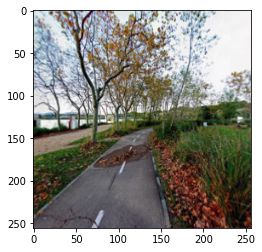

In [13]:
plt.imshow(clear_img)

In [83]:
img = copy_tensor(clear_img)

In [84]:
get_corruption_names('all')

['motion_blur',
 'defocus_blur',
 'glass_blur',
 'gaussian_blur',
 'gaussian_noise',
 'impulse_noise',
 'shot_noise',
 'speckle_noise',
 'brightness',
 'contrast',
 'saturate',
 'jpeg_compression',
 'snow',
 'spatter',
 'fog',
 'frost']

In [97]:
severity = 1

imgs = []
names = []
for corruption in get_corruption_names('all'):
    names.append(corruption)
    imgs.append(corrupt(copy_tensor(clear_img), corruption_name=corruption, severity=severity))

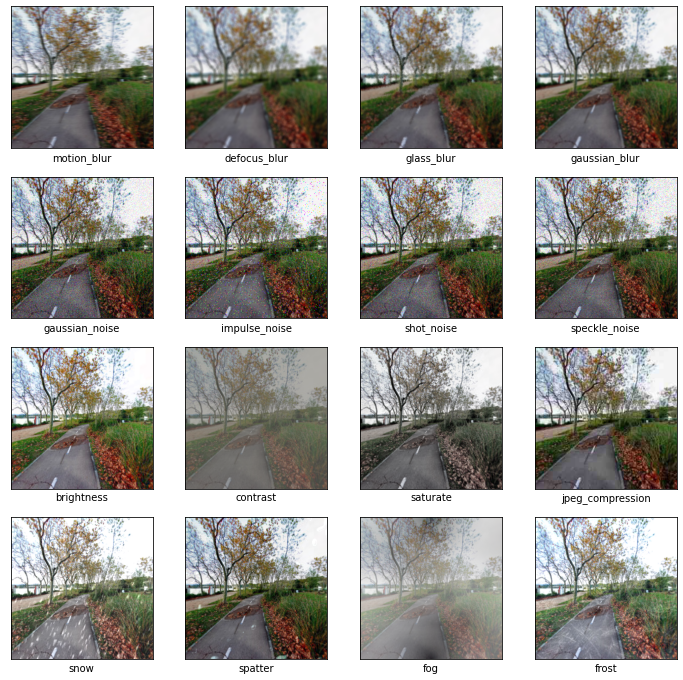

In [98]:
_, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.flatten()
for img, name, ax in zip(imgs, names, axs):
    # ax.set_title(name, fontdict=None, loc='center', color='k')
    ax.set_xlabel(name)
    # ax.axes.yaxis.set_visible(False)
    # ax.axes.xaxis.set_visible(False)
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    ax.imshow(img)
plt.show()

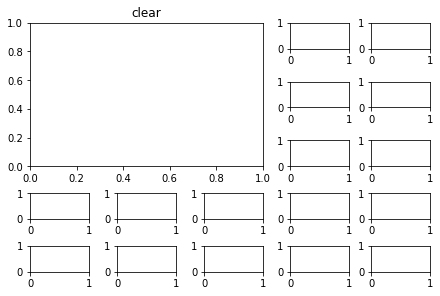

In [99]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(5, 5)
f3_ax1 = fig3.add_subplot(gs[:3, :3])
f3_ax1.set_title('clear')
f3_ax03 = fig3.add_subplot(gs[0, 3])
f3_ax04 = fig3.add_subplot(gs[0, 4])
f3_ax13 = fig3.add_subplot(gs[1, 3])
f3_ax14 = fig3.add_subplot(gs[1, 4])
f3_ax23 = fig3.add_subplot(gs[2, 3])
f3_ax24 = fig3.add_subplot(gs[2, 4])

f3_ax30 = fig3.add_subplot(gs[3, 0])
f3_ax31 = fig3.add_subplot(gs[3, 1])
f3_ax32 = fig3.add_subplot(gs[3, 2])
f3_ax33 = fig3.add_subplot(gs[3, 3])
f3_ax34 = fig3.add_subplot(gs[3, 4])

f3_ax40 = fig3.add_subplot(gs[4, 0])
f3_ax41 = fig3.add_subplot(gs[4, 1])
f3_ax42 = fig3.add_subplot(gs[4, 2])
f3_ax43 = fig3.add_subplot(gs[4, 3])
f3_ax44 = fig3.add_subplot(gs[4, 4])

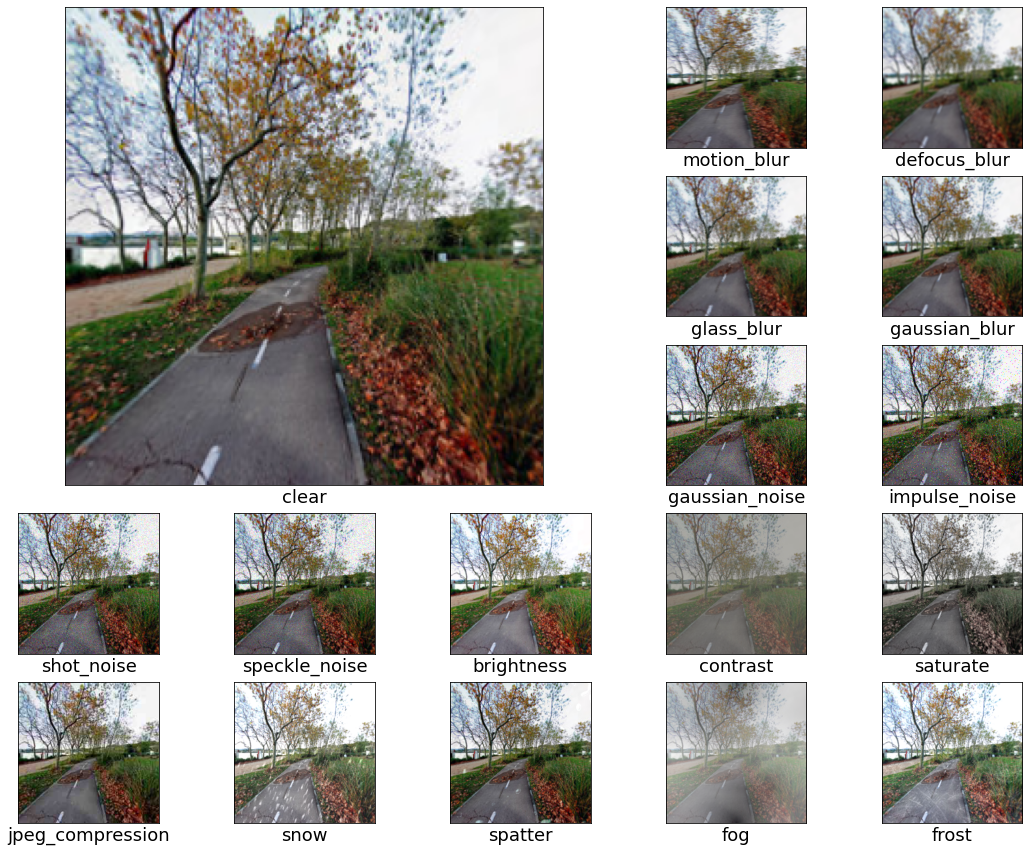

In [100]:
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(ncols=5, nrows=5, left=0.01, right=1, wspace=0.05)

axs = [
    fig.add_subplot(gs[:3, :3]),
    fig.add_subplot(gs[0, 3]),
    fig.add_subplot(gs[0, 4]),
    fig.add_subplot(gs[1, 3]),
    fig.add_subplot(gs[1, 4]),
    fig.add_subplot(gs[2, 3]),
    fig.add_subplot(gs[2, 4]),
    fig.add_subplot(gs[3, 0]),
    fig.add_subplot(gs[3, 1]),
    fig.add_subplot(gs[3, 2]),
    fig.add_subplot(gs[3, 3]),
    fig.add_subplot(gs[3, 4]),
    fig.add_subplot(gs[4, 0]),
    fig.add_subplot(gs[4, 1]),
    fig.add_subplot(gs[4, 2]),
    fig.add_subplot(gs[4, 3]),
    fig.add_subplot(gs[4, 4]),
]

_imgs = [copy_tensor(clear_img)] + imgs
_names = ['clear'] + names

for img, name, ax in zip(_imgs, _names, axs):
    # ax.set_title(name, fontdict=None, loc='center', color='k')
    ax.set_xlabel(name, fontsize=18)
    # ax.axes.yaxis.set_visible(False)
    # ax.axes.xaxis.set_visible(False)
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    ax.imshow(img)
    
plt.savefig(f'corruption_{severity}.pdf', bbox_inches='tight')